In [157]:
import numpy as np

In [158]:
n = 10 # število segmentov
p = 1 # brezdimenzijska sila

theta = np.linspace(-1, 1, n+1) # !! dolžina n+1 !!

def energy_functional(theta, p):
    n=len(theta)
    diffs = np.diff(theta) # theta[i+1] - theta[i]
    v = 0.5 * np.sum(diffs**2) + p/(n+1)**2 * np.sum(np.cos(theta))
    return v

print("v =", round(energy_functional(theta, p), 3))

v = 0.262


In [159]:
from scipy.optimize import minimize

In [160]:
n = 10
theta0 = np.linspace(-1, 1, n+1)
p = 0

res = minimize(fun=energy_functional, x0=theta0, args=(p))
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.232655934816839e-16
        x: [-1.853e-07 -1.930e-07 -1.997e-07 -2.050e-07 -2.131e-07
            -2.254e-07 -2.186e-07 -2.113e-07 -2.017e-07 -1.935e-07
            -1.872e-07]
      nit: 5
      jac: [ 1.509e-08  1.397e-08  1.350e-08  1.770e-08  1.909e-08
            -4.191e-09  1.444e-08  1.257e-08  1.630e-08  1.676e-08
             1.378e-08]
 hess_inv: [[ 3.000e+00  2.000e+00 ... -2.000e+00 -2.000e+00]
            [ 2.000e+00  2.500e+00 ... -1.500e+00 -2.000e+00]
            ...
            [-2.000e+00 -1.500e+00 ...  2.500e+00  2.000e+00]
            [-2.000e+00 -2.000e+00 ...  2.000e+00  3.000e+00]]
     nfev: 72
     njev: 6

In [161]:
import matplotlib.pyplot as plt

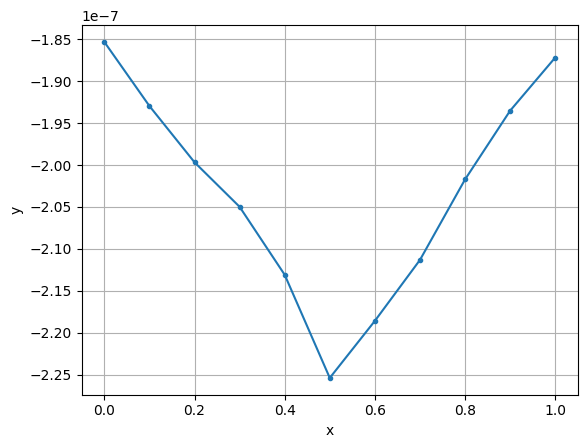

In [162]:
res_theta = res.x
s = np.linspace(0, 1, n+1)

plt.plot(s, res_theta, marker=".")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

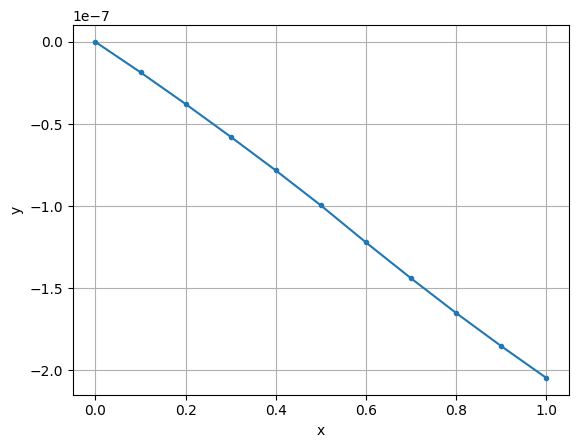

In [163]:
h = s[1] - s[0]

x = [0]
y = [0]

for i in range(n):
    x.append(x[-1] + h * np.cos(res_theta[i]))
    y.append(y[-1] + h * np.sin(res_theta[i]))

x = np.array(x)
y = np.array(y)

plt.plot(x, y, marker=".")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


<h1>Metoda končnih razlik<h1>

$V = \frac{1}{2} E I \sum_{i=0}^{n-1}(\frac{\theta_{i+1}-\theta_{i}}{h})^2 h + P \sum_{i=0}^n \cos{\theta_i} h $

Z uporabo brezdimenzijskih spremenljivk

$v=\frac{1}{n+1} \frac{V L}{E I} = \frac{1}{2} \sum_{i=0}^{n-1} (\theta_{i+1} - \theta_{i})^2 + \frac{p}{(n+1)^2} \sum_{i=0}^{n} \cos{\theta_{i}}$
                                

$p = \frac{P L^2}{E I}$

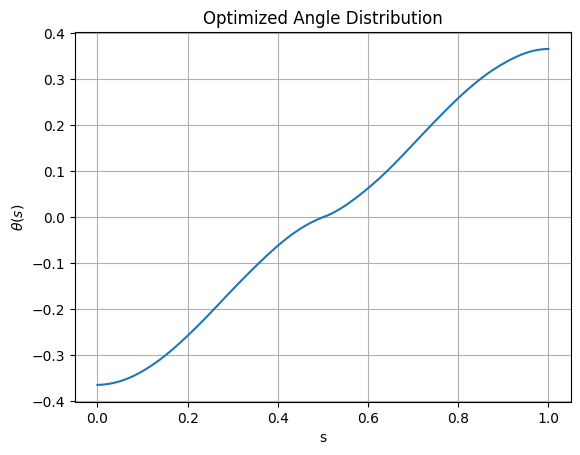

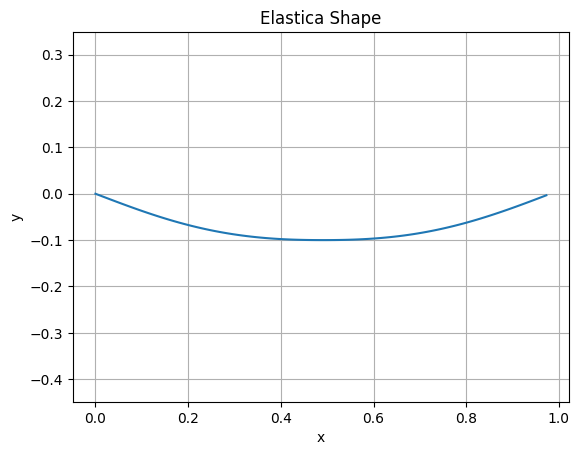

In [205]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parameters
n = 100  # number of segments
p = 30   # dimensionless force
theta0 = np.linspace(-1, 1, n+1)  # initial guess for θ (length n+1)
s, h = np.linspace(0, 1, n+1, retstep=True) # discretized arc-length
c = 0.1

# Energy functional
def energy_functional(theta, p, h):
    n = len(theta) - 1
    diffs = np.diff(theta)  # theta[i+1] - theta[i], length n
    v = 0.5 * np.sum(diffs**2) + p / (n+1)**2 * np.sum(np.cos(theta))
    
    # dx = h * np.cos(theta[:n])  # increments in x direction for each segment
    dy = h * np.sin(theta[:n+1])  # increments in y direction for each segment

    # x = np.concatenate(([0], np.cumsum(dx)))
    y = np.concatenate(([0], np.cumsum(dy)))

    penalty = np.sum(np.maximum(0, y**2 - c**2)) + 1e2*y[-1]**2

    return v + penalty

# Minimize energy
res = minimize(fun=energy_functional, x0=theta0, args=(p, h), method='BFGS')

# Extract optimized theta
res_theta = res.x

# Plot theta(s)
plt.figure()
if n < 30:
    plt.plot(s, res_theta, marker=".")
else:
    plt.plot(s, res_theta)
plt.xlabel("s")
plt.ylabel(r"$\theta(s)$")
plt.title("Optimized Angle Distribution")
plt.grid(True)
plt.show()

# Reconstruct curve (x, y)
x = [0]
y = [0]
for i in range(n):
    x.append(x[-1] + h * np.cos(res_theta[i]))
    y.append(y[-1] + h * np.sin(res_theta[i]))

x = np.array(x)
y = np.array(y)

# Plot shape
plt.figure()
if n < 30:
    plt.plot(x, y, marker=".")
else:
    plt.plot(x, y)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Elastica Shape")
plt.axis("equal")
plt.grid(True)
plt.show()
